## Google, Apple, Facebook Company Locations

In [28]:
# Make your plot output stored in the notebook.
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

### Import all longitues & latitudes into a dictionary.

In [29]:
company_locations_pkl_files = ['google_locations.pkl', 'apple_locations.pkl', 'facebook_locations.pkl']

company_locations_colors = {
    'google_locations': 'green',
    'apple_locations': 'red',
    'facebook_locations': 'blue'
}

company_locations = { c.split('.')[0]: { 
    'longitudes': [], 'latitudes': [], 'locations': [] 
} for c in company_locations_pkl_files }

In [30]:
import pickle

for pkl_file in company_locations_pkl_files:
    with open(pkl_file, 'rb') as f:
        company_locations[pkl_file.split('.')[0]] = pickle.load(f)
        
company_locations['google_locations']['longitudes'][0:10]

[-79.9900861,
 -122.0363496,
 -122.4110835,
 121.4888922,
 103.8520359,
 121.5636796,
 151.2164539,
 34.7805274,
 126.9782914,
 -97.7436995]

In [31]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Chicago Illinois")
print(location.latitude)

41.8755616


In [32]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame


lon = company_locations['google_locations']['longitudes']
lat = company_locations['google_locations']['latitudes']
key = company_locations['google_locations']['locations']

geometry = [Point(xy) for xy in zip(lon, lat)]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(key, crs=crs, geometry=geometry)
gdf.head(10)

,0,geometry
0,"Pittsburgh, PA, USA",POINT (-79.9900861 40.4416941)
1,"Sunnyvale, CA, USA",POINT (-122.0363496 37.3688301)
2,"San Bruno, CA, USA",POINT (-122.4110835 37.6304904)
3,"Shanghai, China",POINT (121.4888922 31.2253441)
4,Singapore,POINT (103.8520359 1.2904753)
5,"Taipei, Taiwan",POINT (121.5636796 25.0375198)
6,"Sydney NSW, Australia",POINT (151.2164539 -33.8548157)
7,"Tel Aviv-Yafo, Israel",POINT (34.7805274 32.0804808)
8,"Seoul, South Korea",POINT (126.9782914 37.5666791)
9,"Austin, TX, USA",POINT (-97.74369950000001 30.2711286)


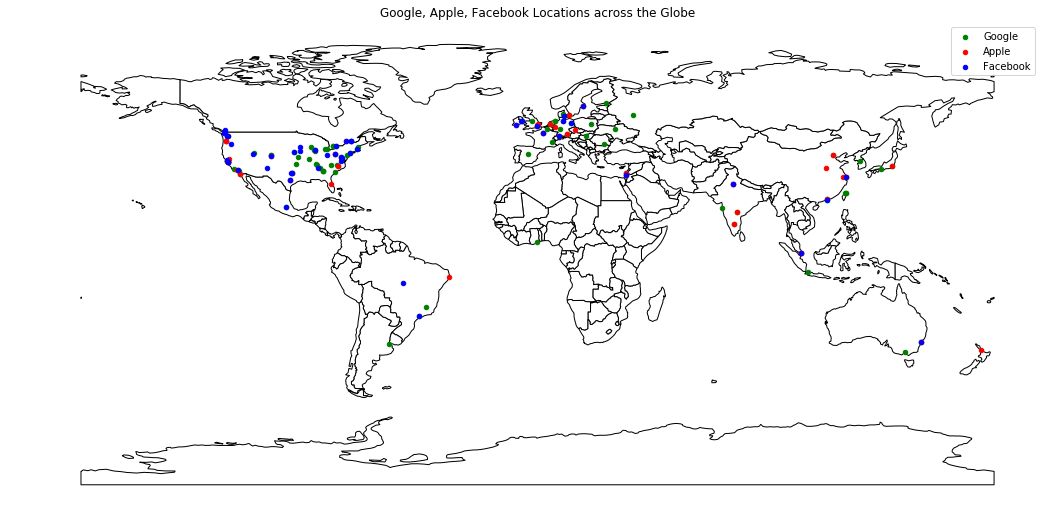

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.plot(color='white', edgecolor='black',figsize=(18,16))
world.legend(['google', 'apple', 'facebook'], title='legend')

for company, color in company_locations_colors.items():
    lon = company_locations[company]['longitudes']
    lat = company_locations[company]['latitudes']
    key = company_locations[company]['locations']
    geometry = [Point(xy) for xy in zip(lon, lat)]
    
    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}
    
    # Creating a Geographic data frame 
    gdf = gpd.GeoDataFrame(key, crs=crs, geometry=geometry)
    gdf.plot(ax=world, marker='o', color=color, markersize=20)
    
world.set_title('Google, Apple, Facebook Locations across the Globe')
world.legend(['Google', 'Apple', 'Facebook'])
world.set_axis_off()